<h2 id='part1'>Analysis of World Happiness Report</h2>

## Import Libraries Needed ##

In [7]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Read the Excel File and Load into a dataframe(2016-2020) ##

In [15]:
#Read all the Excel Files which have Report Data from 2016 to 2020
df_2020=pd.read_csv('./2020.csv')
df_2020['Happiness Rank'] =  range(1, len(df_2020.index)+1)
df_2020 = df_2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                        'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 
                                    'Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Freedom to make life choices' : 'Freedom', 
                                    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_2020['Year']=2020

df_2019 = pd.read_csv('./2019.csv')
df_2019['Year']=2019
df_2019 = df_2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})

df_2018 = pd.read_csv('./2018.csv')
df_2018['Year']=2018
df_2018 = df_2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_2017 = pd.read_csv('./2017.csv')
df_2017 = df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
df_2017['Year']=2017

df_2016= pd.read_csv('./2016.csv')
df_2016['Year']=2016

df_2015 = pd.read_csv('./2015.csv')
df_2015['Year']=2015

df_all = pd.concat([df_2020,df_2019,df_2018,df_2017,df_2016,df_2015])

df_all=df_all[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']]
df_all.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020
1,Denmark,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020
2,Switzerland,3,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2020
3,Iceland,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020
4,Norway,5,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2020


## Understanding the Data ##

In [9]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Happiness Score                             153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Economy (GDP per Capita)                    153 non-null    float64
 7   Family                                      153 non-null    float64
 8   Health (Life Expectancy)                    153 non-null    float64
 9   Freedom                                     153 non-null    float64
 10  Generosity    

In [10]:
#2020 Dataset
df_2020.describe()

,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317,77.000000,2020.0
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638,44.311398,0.0
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241,1.000000,2020.0
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928,39.000000,2020.0
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272,77.000000,2020.0
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267,115.000000,2020.0
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810,153.000000,2020.0


<Figure size 720x360 with 0 Axes>

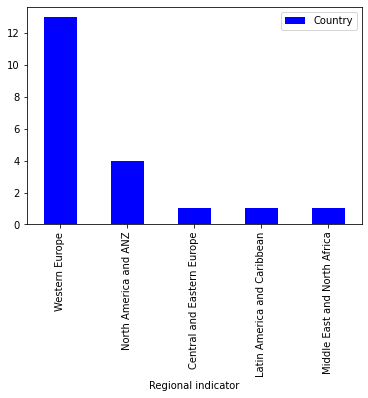

<Figure size 720x360 with 0 Axes>

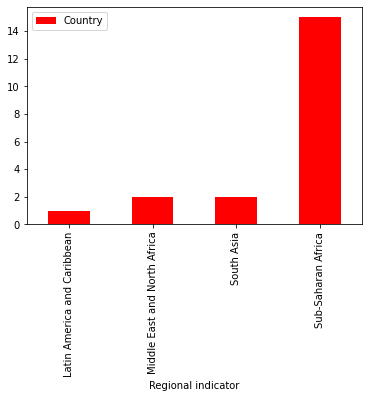

In [36]:
## Visualising Regions with Top Happiness Score 
plt.figure(figsize=(10,5))
df_2020.head(20).groupby('Regional indicator').agg({'Country':'count'}).sort_values(by='Country',ascending=False).plot(kind='bar',color='b')
plt.show()

## Visualising Regions with Least Happiness Score 
plt.figure(figsize=(10,5))
df_2020.tail(20).groupby('Regional indicator').agg({'Country':'count'}).sort_values(by='Country',ascending=True).plot(kind='bar',color='r')
plt.show()


**Conclusion** : Western Europe Region have Highestwith highest Happiness Score While Latin Americs and Carribean with the Least

In [27]:
#Combined Dataset
df_all.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,934.000000,935.000000,935.000000
mean,78.420321,5.394436,2.287264,1.034264,11.057834,0.472008,0.224981,0.180425,2017.485561
std,45.021905,1.124935,3.161344,0.321210,23.799414,0.201962,0.254946,0.153977,1.708260
min,1.000000,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,2015.000000
25%,39.500000,4.540000,0.695145,0.819085,0.508000,0.337772,0.061039,0.098152,2016.000000
50%,78.000000,5.353500,1.070000,1.035160,0.708060,0.465820,0.110800,0.183000,2017.000000
75%,117.000000,6.198500,1.395705,1.281237,0.892350,0.585785,0.285300,0.262000,2019.000000
max,158.000000,7.808700,11.450681,1.644000,76.804581,0.974998,0.935585,0.838075,2020.000000


## Histogram shows the Variablity of Each Metric

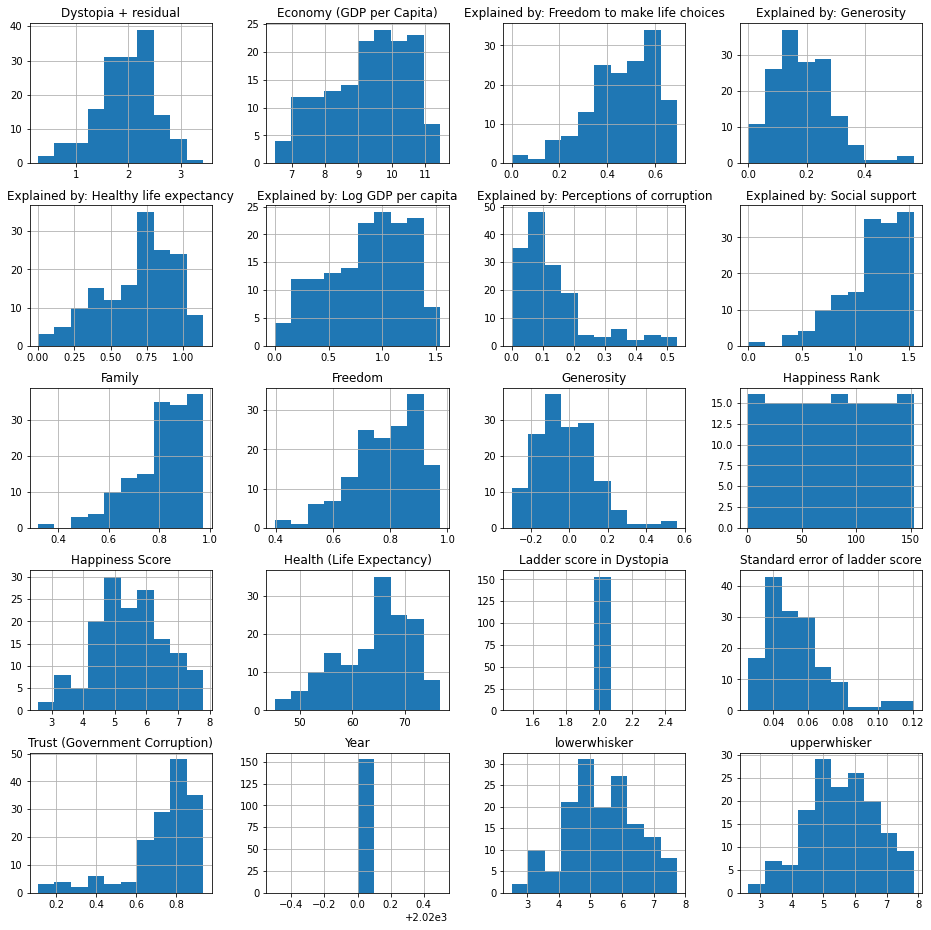

In [48]:
plt.rcParams['figure.figsize'] = (16,16)
df_2020.hist();

In [30]:
#Year Wise Show the First 5 Ranked Countries
df_all[df_all['Happiness Rank']<=5].sort_values(by=['Happiness Rank','Year'],ascending=True)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.5870,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015
0,Denmark,1,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
0,Norway,1,7.5370,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
0,Finland,1,7.6320,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,2018
0,Finland,1,7.7690,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,2019
0,Finland,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020
1,Iceland,2,7.5610,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
1,Switzerland,2,7.5090,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016
1,Denmark,2,7.5220,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2017
1,Norway,2,7.5940,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2018


### Happiness Score comparison of Top 10 countries

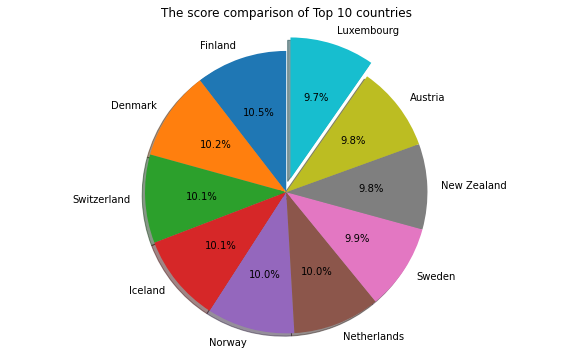

In [49]:
last10_countryname = df_2020["Country"].iloc[0:10]
last10_countryscore = df_2020["Happiness Score"].iloc[0:10]
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(last10_countryscore, explode = (0,0,0,0,0,0,0,0,0,0.1), labels=last10_countryname, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The score comparison of Top 10 countries")
plt.show()

## Least 10 Countries by Overall Happiness Score

In [28]:
df_top20 = df_2020[-10:].sort_values('Happiness Score', ascending = True)
px.bar(df_top20, x='Happiness Score', y='Country',orientation='h',title="Least 10 happiest countries")

**Correlation Map**

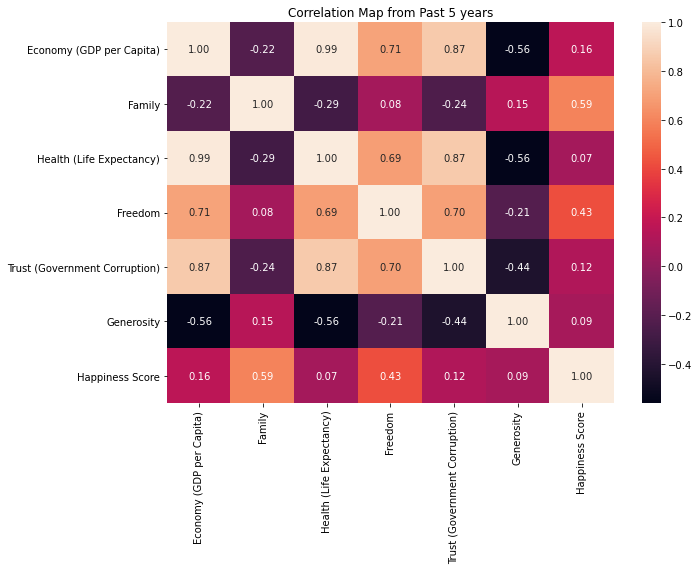

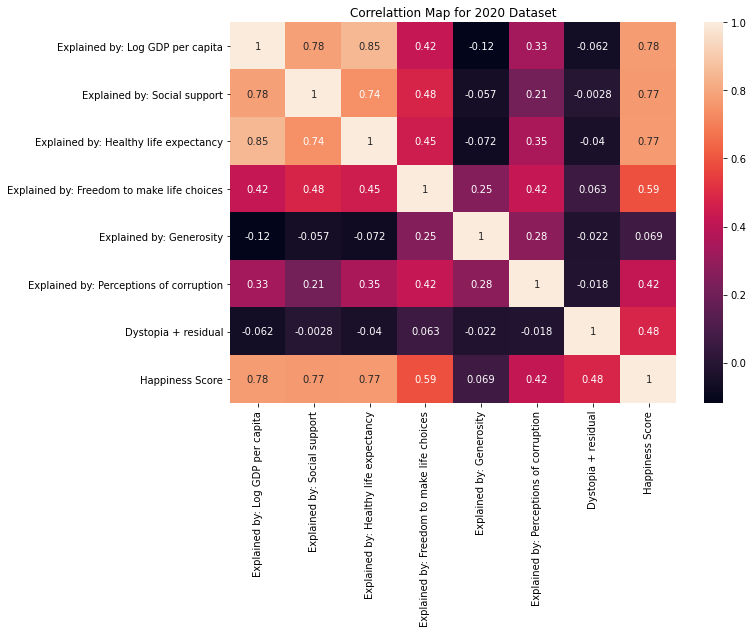

In [47]:
#Corelation of each Variable with each other
plt.figure(figsize=(10,7))
col=df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity','Happiness Score']].corr()
sns.heatmap(col,annot=True,fmt='.2f');
plt.title("Correlation Map from Past 5 years")

col=df_2020[['Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual','Happiness Score']].corr()
plt.figure(figsize=(10,7))
sns.heatmap(col,annot=True)
plt.title('Correlattion Map for 2020 Dataset')
plt.show()

**Conclusion** : Happiness Score is correlated with GDP,Health expectancy and Social support and is not corellated to Generosity for 2020 Dataset

Happiness Score is correlated with Family,Freedom to Make choices and is not corellated to Generosity for the Data from Past 5 years(2016-2020)

**Filling Missing Values with Mean of each column**

In [49]:
#FIll missing Values with Mean
df_all.fillna((df_all.mean()), inplace = True)
df_2020.fillna((df_2020.mean()), inplace = True)

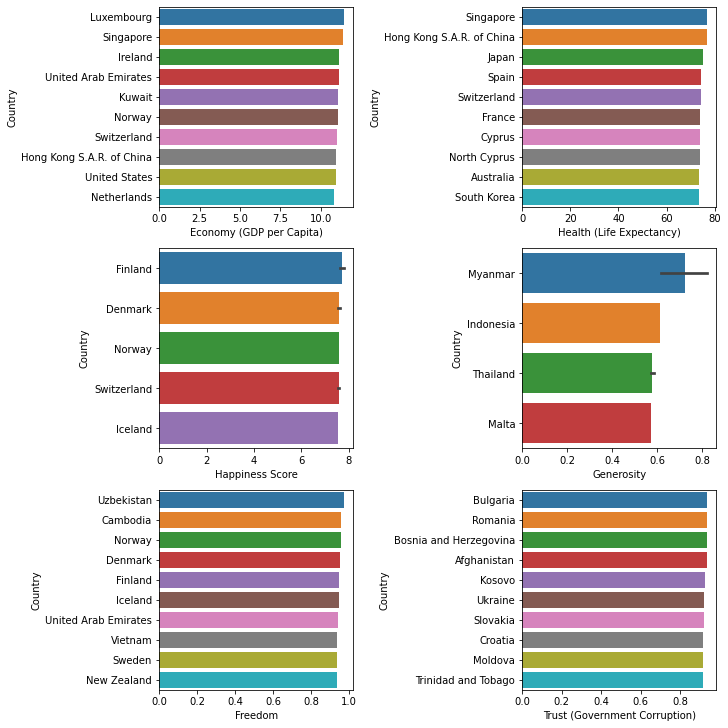

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df_all.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette=None)
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df_all.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette=None)
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df_all.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette=None)
sns.barplot(x='Generosity' ,y='Country',
                        data=df_all.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette=None)
sns.barplot(x='Freedom' ,y='Country',
                        data=df_all.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette=None)
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df_all.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette=None)

### Trend of Different Features over the Years against the Happiness Score - Analysed for Few Countries

In [67]:
countries=['India','United States','United Kingdom','Russia','China','Canada','Germany','France','Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland',
       'Netherlands','Japan', 'South Korea','Italy']
df_i=df_all[df_all['Country'].isin(countries)]
fig=px.line(df_i,x='Year',y='Happiness Score',color='Country',title='Countries Trend with Happiness Score')
fig.show()

fig=px.line(df_i,x='Year',y='Economy (GDP per Capita)',color='Country',title='Countries Trend with Economy (GDP per Capita)')
fig.show()

fig=px.line(df_i,x='Year',y='Trust (Government Corruption)',color='Country',title='Countries Trend with Trust (Government Corruption)')
fig.show()




In [65]:
df_all.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

**Conclusion** - Finland Trend from Past 5 years is increasing while India's Trend is decreasing

## Linear Regression Model for 2020 Dataset

In [50]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables was 0.5822946834680569 on 31 values.


In [56]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables except Generosity was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables except Generosity was 0.5997813846014516 on 31 values.


The Accuracy Increased when the Genorosity Feature is removed from the model

In [55]:
df_all.fillna((df_all.mean()), inplace = True)
y=df_all['Happiness Score']
X=df_all[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_test_preds = lin_reg.predict(X_test)
score=lin_reg.score(X_test, Y_test)
mse = mean_squared_error(Y_test, y_test_preds)
mae = mean_absolute_error(Y_test, y_test_preds)
r2 = r2_score(Y_test, y_test_preds)
r2, mse
print("The r-squared score for the Test model using only quantitative variables was {} on {} values.".format(r2,len(y_test_preds)))

The r-squared score for the Test model using only quantitative variables was 0.6596653871355431 on 187 values.


In [52]:
y=df_2020['Happiness Score']
X=df_2020[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Ladder score in Dystopia']]

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
y_train_preds = lin_reg.predict(X_train)
score=lin_reg.score(X_train, Y_train)
mse = mean_squared_error(Y_train, y_train_preds)
mae = mean_absolute_error(Y_train, y_train_preds)
r2 = r2_score(Y_train, y_train_preds)
r2, mse
print("The r-squared score for the Train model using only quantitative variables was {} on {} values.".format(r2,len(y_train_preds)))

The r-squared score for the Train model using only quantitative variables was 0.7652214982201763 on 122 values.


**Conclusion** - Linear Regression has low mean squared error for both train(76%) and test(59%) still the performance can be improved with the usage of other Algorithms

In [78]:
df_2020

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,149,2020
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,150,2020
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,151,2020
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,152,2020


In [49]:
df_all = df_all.apply(lambda col:col.fillna(0))

'Country', 'Happiness Rank','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'

df_all['Trust (Government Corruption)'].value_counts()

np.sum(df_all['Happiness Score'].isnull())

0

## Data Analysis on 2020 Dataset

In [30]:
df_2020.head(20).groupby('Regional indicator').agg({'Country':'count'}).sort_values(by='Country',ascending=False)

,Country
Regional indicator,
Western Europe,13
North America and ANZ,4
Central and Eastern Europe,1
Latin America and Caribbean,1
Middle East and North Africa,1
